In [1]:
import pandas as pd
import numpy as np
import shared
import static_individual_estimates
import json


In [2]:
ve_or_ju = "ve"

In [3]:
import time

startTime = time.time()

In [4]:
runs_orig = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [5]:
country_counts = runs_orig["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 100]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN', 'SWE', 'NOR', 'RUS', 'LAT', 'EST', 'SUI', 'GBR']

In [6]:
runs_orig["first_name"] = runs_orig.name.str.split(" ", expand=True).iloc[:, 0]
runs_df = runs_orig
runs_df.head()

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
0,anna mårsell,2018,3,STORA TUNA OK,SWE,6.441,1,4,anna
1,anna mårsell,2017,7,STORA TUNA OK,SWE,7.214,1,4,anna
2,anna mårsell,2016,22,STORA TUNA OK,SWE,6.291,1,4,anna
3,anna mårsell,2011,40,STORA TUNA OK,SWE,6.497,2,4,anna
4,magdalena olsson,2018,3,STORA TUNA OK,SWE,6.511,2,7,magdalena


In [7]:
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

In [8]:
# Temporarily remove 2018 in order to try predict it in other notebook
#runs_df = runs_df[runs_df.year != 2018]
#runs_df

In [9]:
features = static_individual_estimates.preprocess_features(runs_df, top_countries, ve_or_ju)
features.head(10)


2019-11-06 20:48:38,142 None
2019-11-06 20:48:38,294 None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 9 columns):
name            39906 non-null object
year            39906 non-null int64
team_id         39906 non-null int64
team            39906 non-null object
team_country    39906 non-null object
pace            39906 non-null float64
leg_nro         39906 non-null int64
num_runs        39906 non-null int64
first_name      39906 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
first_name           943 non-null object
mean_pace_count      943 non-null int64
fn_pace_class        943 non-null int64
fn_pace_std_class    943 non-null int64
dtypes: int64(3), object(1)
memory usage: 29.6+ KB


2019-11-06 20:48:38,936 []


,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,c_EST,c_FIN,c_GBR,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,3,0.477121,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7,0.845098,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,22,1.342423,484,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40,1.602060,1600,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0.477121,9,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,7,0.845098,49,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,28,1.447158,784,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,32,1.505150,1024,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,27,1.431364,729,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,34,1.531479,1156,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 41 columns):
team_id                  -39906 non-null int64
team_id_log10            -39906 non-null float64
team_id_square           -39906 non-null int64
leg_1                    -39906 non-null Sparse[uint8, 0]
leg_2                    -39906 non-null Sparse[uint8, 0]
leg_3                    -39906 non-null Sparse[uint8, 0]
leg_4                    -39906 non-null Sparse[uint8, 0]
c_EST                    -39906 non-null Sparse[uint8, 0]
c_FIN                    -39906 non-null Sparse[uint8, 0]
c_GBR                    -39906 non-null Sparse[uint8, 0]
c_LAT                    -39906 non-null Sparse[uint8, 0]
c_NOR                    -39906 non-null Sparse[uint8, 0]
c_OTHER                  -39906 non-null Sparse[uint8, 0]
c_RUS                    -39906 non-null Sparse[uint8, 0]
c_SUI                    -39906 non-null Sparse[uint8, 0]
c_SWE                    -39906 non-null Sparse[uint

In [11]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(39906, 41)

(39906, 1)

In [12]:
reports = [f'x.shape: {x.shape}', f'y.shape: {y.shape}', features.info()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 41 columns):
team_id                  -39906 non-null int64
team_id_log10            -39906 non-null float64
team_id_square           -39906 non-null int64
leg_1                    -39906 non-null Sparse[uint8, 0]
leg_2                    -39906 non-null Sparse[uint8, 0]
leg_3                    -39906 non-null Sparse[uint8, 0]
leg_4                    -39906 non-null Sparse[uint8, 0]
c_EST                    -39906 non-null Sparse[uint8, 0]
c_FIN                    -39906 non-null Sparse[uint8, 0]
c_GBR                    -39906 non-null Sparse[uint8, 0]
c_LAT                    -39906 non-null Sparse[uint8, 0]
c_NOR                    -39906 non-null Sparse[uint8, 0]
c_OTHER                  -39906 non-null Sparse[uint8, 0]
c_RUS                    -39906 non-null Sparse[uint8, 0]
c_SUI                    -39906 non-null Sparse[uint8, 0]
c_SWE                    -39906 non-null Sparse[uint

In [13]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(31924, 41)

In [15]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))

    reports.append(f'{type(model)}: {model.get_params()}')
    reports.append(f'Explained variance score: {r2_score(np.exp(y_test), y_pred).round(3)}')
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [16]:
y_train.shape

(31924, 1)

Shapes: y_test=(7982, 1) y_pred=(7982,)
Mean squared error: 5.447
Explained variance score: 0.429


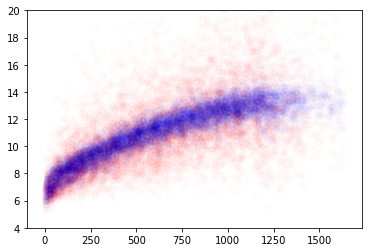

CPU times: user 776 ms, sys: 470 ms, total: 1.25 s
Wall time: 363 ms


In [17]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [18]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,6.344158e-04
1,team_id_log10,5.908596e-02
2,team_id_square,-2.487898e-07
3,leg_1,-4.462197e-02
4,leg_2,-3.405239e-03
5,leg_3,2.861715e-02
6,leg_4,1.941006e-02
7,c_EST,3.887972e-02
8,c_FIN,6.285737e-02
9,c_GBR,1.114239e-02


      Iter       Train Loss   Remaining Time 
         1           0.0634           45.81s
         2           0.0583           43.09s
         3           0.0542           43.86s
         4           0.0508           43.62s
         5           0.0481           42.55s
         6           0.0458           42.99s
         7           0.0440           42.16s
         8           0.0425           41.33s
         9           0.0412           41.95s
        10           0.0401           42.00s
        20           0.0355           39.90s
        30           0.0341           36.89s
        40           0.0335           35.85s
        50           0.0331           34.78s
        60           0.0329           33.19s
        70           0.0327           31.87s
        80           0.0326           30.91s
        90           0.0324           30.31s
       100           0.0323           29.59s
       200           0.0317           24.83s
       300           0.0312           20.79s
       40

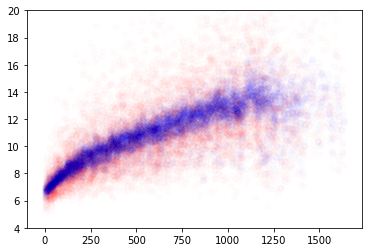

CPU times: user 29.9 s, sys: 116 ms, total: 30 s
Wall time: 29.8 s


In [19]:
%%time
gbr_num_estimators=1000
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [20]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0591           19.08s
         2           0.0565           18.51s
         3           0.0543           18.60s
         4           0.0523           19.52s
         5           0.0507           20.03s
         6           0.0491           20.71s
         7           0.0478           20.80s
         8           0.0468           20.98s
         9           0.0459           20.87s
        10           0.0451           21.08s
        20           0.0416           21.17s
        30           0.0407           20.72s
        40           0.0403           20.10s
        50           0.0400           18.66s
        60           0.0399           17.39s
        70           0.0398           16.58s
        80           0.0397           16.07s
        90           0.0396           15.38s
       100           0.0395           14.82s
       200           0.0391           11.23s
       300           0.0389            7.45s
       40

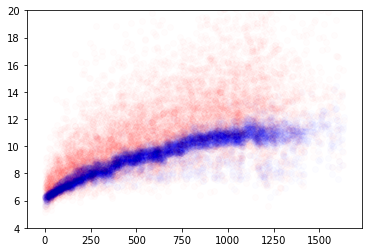

In [21]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0629           29.06s
         2           0.0608           29.03s
         3           0.0590           29.68s
         4           0.0574           29.45s
         5           0.0561           29.46s
         6           0.0550           29.60s
         7           0.0539           29.46s
         8           0.0531           29.39s
         9           0.0523           29.30s
        10           0.0516           29.16s
        20           0.0480           27.26s
        30           0.0468           26.03s
        40           0.0462           24.08s
        50           0.0459           22.92s
        60           0.0457           21.45s
        70           0.0455           20.29s
        80           0.0454           19.56s
        90           0.0453           18.93s
       100           0.0452           18.33s
       200           0.0446           12.63s
       300           0.0444            7.88s
       40

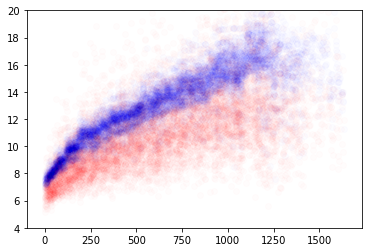

In [22]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [23]:
joblib.dump(gbr, f'gbr_{ve_or_ju}.sav')
joblib.dump(gbr_q_low, f'gbr_q_low_{ve_or_ju}.sav')
joblib.dump(gbr_q_high, f'gbr_q_high_{ve_or_ju}.sav')


['gbr_q_high_ve.sav']

In [24]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [25]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)
gbr_q_pred_errors["q_interval"] = gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low


gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
# Intentionally don't use log scale for calculation to get bigger std
# TODO IS this causing big std in Bayesian models? :(
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

gbr_reports = [
    f'q_low_error.mean {gbr_q_pred_errors.q_low_error.mean().round(4)}',
    f'q_high_error.mean {gbr_q_pred_errors.q_high_error.mean().round(4)}',
    f'q_error.mean {gbr_q_pred_errors.q_error.mean().round(4)}',

    f'q_interval.mean {gbr_q_pred_errors.q_interval.mean().round(4)}',
    f'q_interval.median {gbr_q_pred_errors.q_interval.median().round(4)}',

    f'std.mean {gbr_q_pred_errors["std"].mean().round(4)}',
    f'std_correct.mean {gbr_q_pred_errors["std_correct"].mean().round(4)}',
    f'abs_error_in_stds.mean {gbr_q_pred_errors["abs_error_in_stds"].mean().round(4)}',
    f'abs_error.mean {gbr_q_pred_errors["abs_error"].mean().round(4)}',
    f'abs_error.median {gbr_q_pred_errors["abs_error"].median().round(4)}'
]


display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_reports)


,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,q_interval,std,std_correct,abs_error,abs_error_in_stds
7967,7.135,8.063,7.877,8.585,False,False,False,1.449,0.725,1.097,0.186,0.062
7968,6.960,6.756,7.629,8.550,True,False,True,1.590,0.795,1.108,0.873,0.288
7969,10.204,9.841,11.536,14.076,True,False,True,3.872,1.936,1.175,1.695,0.524
7970,7.935,10.937,9.299,11.080,False,False,False,3.145,1.573,1.182,1.638,0.502
7971,6.801,7.687,7.647,8.747,False,False,False,1.946,0.973,1.134,0.040,0.013
7972,8.041,8.648,9.532,10.902,False,False,False,2.861,1.431,1.164,0.884,0.276
7973,8.032,15.304,9.825,11.473,False,True,True,3.441,1.720,1.195,5.479,1.658
7974,10.688,10.764,12.921,16.963,False,False,False,6.275,3.138,1.260,2.157,0.612
7975,10.744,10.245,13.452,16.526,True,False,True,5.782,2.891,1.240,3.207,0.928
7976,9.875,11.398,12.252,14.151,False,False,False,4.276,2.138,1.197,0.854,0.258


['q_low_error.mean 0.1718',
 'q_high_error.mean 0.1673',
 'q_error.mean 0.3389',
 'q_interval.mean 3.8795',
 'q_interval.median 3.7636',
 'std.mean 1.9397',
 'std_correct.mean 1.1854',
 'abs_error_in_stds.mean 0.4905',
 'abs_error.mean 1.6231',
 'abs_error.median 1.2091']

In [26]:
reports.extend(gbr_reports)

In [27]:
gbr_q_pred_errors[['q_error', "q_low", "q_high", "q_interval", "abs_error", "std"]].groupby('q_error').agg(["median"]).round(2)

,q_low,q_high,q_interval,abs_error,std
,median,median,median,median,median
q_error,,,,,
False,9.50,13.38,3.82,0.76,1.91
True,9.37,13.07,3.68,2.62,1.84


In [28]:
endTime = time.time()
reports.append(f"runtime {round(((endTime - startTime)/ 60), 2)} mins")
shared.write_simple_text_report(reports, f'preprocess_priors_{ve_or_ju}.txt')

In [29]:
shared.log_df(f"{ve_or_ju} runtime {round(((endTime - startTime)/ 60), 2)} mins")

2019-11-06 20:49:46,569 ve runtime 1.14 mins


In [30]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])